# Data Science and Business Analytics

The Sparks Foundation GRIP August 2021

**Author: Joshua Paul**

# Task 2: Prediction using Unsupervised ML

In this task we ues K Means to predict the species of an Iris flower

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

**Reading Data**

In [16]:
#iris=datasets.load_iris()
#df=pd.DataFrame(iris.data,columns=iris.feature_names)
df=pd.read_csv("Iris.csv")
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Prediction Using K Means

In [3]:
from sklearn.cluster import KMeans

In [14]:
#df.iplot(x=)
x=df.drop('Species',axis=1)

In [15]:
x = df.iloc[:, [0, 1, 2, 3]].values

# **Elbow Method to determine best number of clusters**

In [8]:
error=[]
for i in range(1,40):
    km=KMeans(n_clusters=i)
    km.fit(x)
    error.append(km.inertia_)

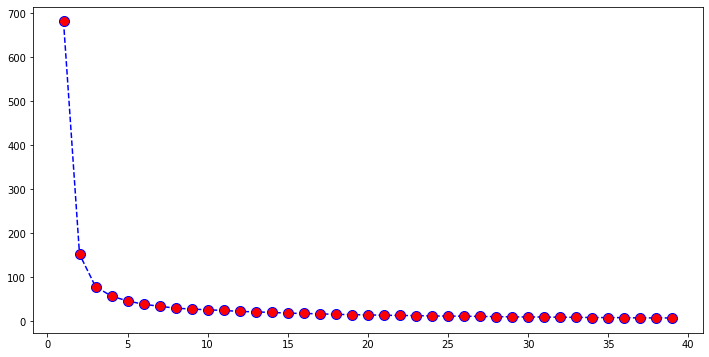

In [9]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)

**The best fit is 3 because the error starts smoothening out after 3 clusters**

In [10]:
km=KMeans(n_clusters=3)
#km.fit(x)
pred=km.fit_predict(x)
#km.cluster_centers_
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [12]:
#cluster centers
print(km.cluster_centers_[:])
print()
print(km.cluster_centers_[:,0])

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]

[6.85      5.006     5.9016129]


# Plotting the clusters

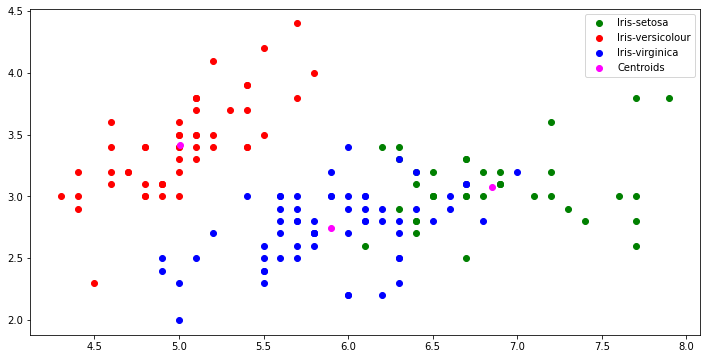

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(x[pred==0][:,0],x[pred==0][:,1],color='green',label = 'Iris-setosa')
plt.scatter(x[pred==1][:,0],x[pred==1][:,1],color='red',label = 'Iris-versicolour')
plt.scatter(x[pred==2][:,0],x[pred==2][:,1],color='blue',label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='magenta',label='Centroids')
plt.legend()
